In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### creating decision stump 

In [3]:
class adaboost:
    def loadSimpleData():
        data = np.array([
            [1., 2.1],
            [1.6, 1.6],
            [1.3, 1.],
            [1., 1.],
            [2., 1.]
        ])
        labels = np.array([1.0, 1.0, -1.0, -1.0, 1.0])
        return data, labels

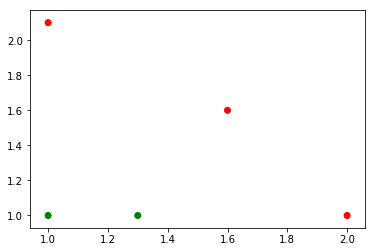

In [4]:
dataset, labels = adaboost.loadSimpleData()
plt.scatter(dataset[:, 0], dataset[:,1],c=['r' if l == 1 else 'g' for l in labels])

### using sklearn 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [6]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=5)



In [7]:
X = dataset
y = labels
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=5, random_state=None)

In [8]:
bdt.get_params()

{'algorithm': 'SAMME',
 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': False,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 5,
 'random_state': None}

In [9]:
bdt.predict([[1,1]])

array([-1.])

In [10]:
bdt.predict([[1., 2.1],
            [1.6, 1.6],
            [1.3, 1.],
            [1., 1.],
            [2., 1.]])

array([ 1.,  1., -1., -1.,  1.])

In [11]:
plot_step = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

In [12]:
x_min, x_max

(0.0, 3.0)

In [13]:
y_min, y_max

(0.0, 3.1)

In [14]:
xx

array([[0.  , 0.01, 0.02, ..., 2.97, 2.98, 2.99],
       [0.  , 0.01, 0.02, ..., 2.97, 2.98, 2.99],
       [0.  , 0.01, 0.02, ..., 2.97, 2.98, 2.99],
       ...,
       [0.  , 0.01, 0.02, ..., 2.97, 2.98, 2.99],
       [0.  , 0.01, 0.02, ..., 2.97, 2.98, 2.99],
       [0.  , 0.01, 0.02, ..., 2.97, 2.98, 2.99]])

In [15]:
xx.shape

(310, 300)

In [16]:
yy

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [3.07, 3.07, 3.07, ..., 3.07, 3.07, 3.07],
       [3.08, 3.08, 3.08, ..., 3.08, 3.08, 3.08],
       [3.09, 3.09, 3.09, ..., 3.09, 3.09, 3.09]])

In [17]:
xx.ravel()

array([0.  , 0.01, 0.02, ..., 2.97, 2.98, 2.99])

In [18]:
xx.ravel().shape

(93000,)

In [19]:
np.c_[xx.ravel(), yy.ravel()]

array([[0.  , 0.  ],
       [0.01, 0.  ],
       [0.02, 0.  ],
       ...,
       [2.97, 3.09],
       [2.98, 3.09],
       [2.99, 3.09]])

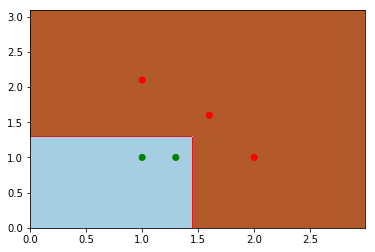

In [20]:
Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:,1],c=['r' if l == 1 else 'g' for l in y])

###  raw adaboost code 

In [21]:
dataArr = dataset[:]
dataArr

array([[1. , 2.1],
       [1.6, 1.6],
       [1.3, 1. ],
       [1. , 1. ],
       [2. , 1. ]])

In [22]:
dataArr[:, 0] > 1

array([False,  True,  True, False,  True])

In [23]:
# dataArr[dataArr[:, 0] > 1, 0] = 0
# dataArr
dataset

array([[1. , 2.1],
       [1.6, 1.6],
       [1.3, 1. ],
       [1. , 1. ],
       [2. , 1. ]])

In [24]:
def stumpClassify(dataArr, i, thresVal, inequal): # dataArr, feature_axis, threshold value, 'lt'or'gt
    retArray = np.ones(dataArr.shape[0])
    if inequal == 'lte':
        retArray[dataArr[:, i] <= thresVal] = -1.0
    else:
        retArray[dataArr[:, i] > thresVal] = -1.0
    return retArray

In [25]:
stumpClassify(dataset, 1, 1.5, 'lte')   # on feature axis 1, less then equal 1.5, all set to -1

array([ 1.,  1., -1., -1., -1.])

In [26]:
stumpClassify(dataset, 0, 1.5, 'gt')   # on feature axis 0, greater then 1.5, all set to -1

array([ 1., -1.,  1.,  1., -1.])

#### build weak learner, decision stump

In [27]:
def buildStump(dataArr, classLabels, D):
    m,n = dataArr.shape
#     print(m, n)
    numSteps = 10.0
    bestStump = {}
    bestClasEst = np.zeros(m)
    minError = np.inf
    for i in range(n): # for each feature
        rangeMin = dataArr[:, i].min()
        rangeMax = dataArr[:, i].max()
        stepSize = (rangeMax - rangeMin) / numSteps
        for j in range(-1, int(numSteps)+ 1):  # for each step
            thresVal = (rangeMin + float(j) * stepSize)  # calculate threshold value for each step
            for inequal in ['lte', 'gt']: # enumerate <, >
                predictedVals = stumpClassify(dataArr, i, thresVal, inequal)
                errArr = np.ones(m)
                errArr[predictedVals == classLabels] = 0
                weightedError = np.dot(D, errArr)  # error rate
#                 print('{} {} {} {} {} {}'.format(i, inequal, thresVal, predictedVals, errArr, weightedError))
                # print(errArr)
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals
                    bestStump['dim'] = i
                    bestStump['thresh'] = thresVal
                    bestStump['ineq'] = inequal
    return {'bestStump':bestStump, 'minError':minError, 'bestClasEst':bestClasEst}
                    
                    

In [28]:
D = np.ones(5) / 5.0
print(D.shape)

(5,)


In [29]:
print(dataset)
print(labels)
buildStump(dataset, labels, D)

[[1.  2.1]
 [1.6 1.6]
 [1.3 1. ]
 [1.  1. ]
 [2.  1. ]]
[ 1.  1. -1. -1.  1.]


{'bestClasEst': array([-1.,  1., -1., -1.,  1.]),
 'bestStump': {'dim': 0, 'ineq': 'lte', 'thresh': 1.3},
 'minError': 0.2}

### implementing adaboost 

In [112]:
def adaboost(dataset, labels, M):
    sample_num, feature_num = dataset.shape
    D = np.ones(sample_num) / sample_num
#     print(D)
    weakClassArr = []
    aggClassEst = np.zeros(sample_num)
    for m in range(M):
        stump = buildStump(dataset, labels, D)
#         print(stump)
        
        alpha_m = 0.5*np.log((1-stump['minError'])/np.max([stump['minError'], 1e-16]))
        stump['bestStump']['alpha'] = alpha_m
        weakClassArr.append(stump['bestStump'])
#         print(alpha_m)
        
        expon = -alpha_m * labels*stump['bestClasEst']
#         print(expon)
        expon_term = np.e ** expon
#         print(expon_term)
        Z_m = np.dot(D, expon_term)
#         print(Z_m)
        
        # calculate D for next round
        D = D * expon_term / Z_m
#         print(D)
#         same as 2 above lines
#         D = D * expon_term
#         D = D / D.sum()
#         print('D: ', D)

        aggClassEst += alpha_m * stump['bestClasEst']
#         print(np.sign(aggClassEst))
        aggErrors = (np.sign(aggClassEst) != labels) * np.ones(sample_num)
#         print(aggErrors)
        errorRate = aggErrors.mean()
#         print(errorRate)
        if errorRate < 1e-3:
            break
    print('train error: ', errorRate)
    return weakClassArr

In [113]:
adaboost_classifier = adaboost(dataset, labels, 5)

train error:  0.0


In [114]:
np.log(np.e)

1.0

In [115]:
np.e**0.69314718

1.9999999988801092

#### adaboost predict 

In [116]:
def predict(X, classifier):
    pred_label = np.zeros(X.shape[0])
    for i, sample in enumerate(X):
        for sub_c in classifier:
            value = sample[sub_c['dim']]
            if sub_c['ineq'] == 'lte':
                pred_label[i] += sub_c['alpha'] * ( -1 if value <= sub_c['thresh'] else 1)
            else:
                pred_label[i] += sub_c['alpha'] * ( -1 if value > sub_c['thresh'] else 1)
    return list(np.sign(pred_label))
#     return pred_label

def predict_fast(X, classifier):
    pred_label = np.zeros(X.shape[0])
    for sub_c in classifier:
        pred_label += sub_c['alpha'] * stumpClassify(X, sub_c['dim'], sub_c['thresh'], sub_c['ineq'])
#         print(pred_label)
    return list(np.sign(pred_label))

In [117]:
X = np.array([
            [1., 2.1],
            [1.6, 1.6],
            [1.3, 1.],
            [1., 1.],
            [2., 1.]
        ])

In [118]:
predict(X, adaboost_classifier)

[1.0, 1.0, -1.0, -1.0, 1.0]

In [119]:
predict_fast(X, adaboost_classifier)

[1.0, 1.0, -1.0, -1.0, 1.0]

In [120]:
X = np.array([[0,0]])
X.shape

(1, 2)

In [121]:
predict_fast(X, adaboost_classifier)

[-1.0]

### test on horse colic dataset

In [122]:
def load_data(filename):
    data_arr = []
    labels = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip().split()
            data_arr.append([float(l) for l in line[:-1] ])
            labels.append(float(line[-1]))
#             print(line)
#     print(data_arr[0])
    return np.array(data_arr), np.array(labels)

In [123]:
X_train, y_train = load_data('horseColicTraining.txt')

In [124]:
X_train.shape

(299, 21)

In [125]:
y_train.shape

(299,)

In [126]:
set(y_train)

{0.0, 1.0}

In [127]:
y_train[:10]

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1.])

In [128]:
y_train[y_train < 1e-6] = -1

In [157]:
y_train[:10]

array([-1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.])

In [158]:
X_train[:2]

array([[ 2. ,  1. , 38.5, 66. , 28. ,  3. ,  3. ,  0. ,  2. ,  5. ,  4. ,
         4. ,  0. ,  0. ,  0. ,  3. ,  5. , 45. ,  8.4,  0. ,  0. ],
       [ 1. ,  1. , 39.2, 88. , 20. ,  0. ,  0. ,  4. ,  1. ,  3. ,  4. ,
         2. ,  0. ,  0. ,  0. ,  4. ,  2. , 50. , 85. ,  2. ,  2. ]])

In [213]:
adaboost_c = adaboost(X_train, y_train, 100)

train error:  0.19063545150501673


In [214]:
adaboost_c

[{'alpha': 0.4616623792657674, 'dim': 9, 'ineq': 'gt', 'thresh': 3.0},
 {'alpha': 0.3124824504246713, 'dim': 17, 'ineq': 'gt', 'thresh': 52.5},
 {'alpha': 0.2868097320169577,
  'dim': 3,
  'ineq': 'gt',
  'thresh': 55.199999999999996},
 {'alpha': 0.23297004638939506,
  'dim': 18,
  'ineq': 'lte',
  'thresh': 62.300000000000004},
 {'alpha': 0.19803846151213728, 'dim': 10, 'ineq': 'lte', 'thresh': 0.0},
 {'alpha': 0.18847887349020628, 'dim': 5, 'ineq': 'gt', 'thresh': 2.0},
 {'alpha': 0.15227368997476812, 'dim': 12, 'ineq': 'lte', 'thresh': 1.2},
 {'alpha': 0.15510870821690478, 'dim': 7, 'ineq': 'gt', 'thresh': 1.2},
 {'alpha': 0.13536197353359364, 'dim': 5, 'ineq': 'lte', 'thresh': 0.0},
 {'alpha': 0.12521587326132078,
  'dim': 4,
  'ineq': 'lte',
  'thresh': 28.799999999999997},
 {'alpha': 0.1334764812820767, 'dim': 11, 'ineq': 'gt', 'thresh': 2.0},
 {'alpha': 0.14182243253771037, 'dim': 9, 'ineq': 'lte', 'thresh': 4.0},
 {'alpha': 0.10264268449708028, 'dim': 14, 'ineq': 'gt', 'thresh'

In [241]:
X_test, y_test = load_data('horseColicTest.txt')
y_test[y_test < 1e-6] = -1

In [242]:
X_test.shape

(67, 21)

In [243]:
y_test.shape

(67,)

In [246]:
y_predicted = np.array(predict_fast(X_test, adaboost_c))
y_predicted

array([ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.])

In [247]:
predict_error = (y_test != y_predicted).mean()
print('predict error: ', predict_error)

predict error:  0.22388059701492538


#### sklearn adaboost 

In [260]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=100)

In [265]:
bdt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [269]:
# traning set accuracy
print(bdt.score(X_train, y_train))
# error rate
print(1 - bdt.score(X_train, y_train))

0.8260869565217391
0.17391304347826086


In [270]:
y_predicted = bdt.predict(X_test)
# y_predicted[y_predicted == -1] = 0
print(y_predicted)
print(y_test)
predict_error = (y_test != y_predicted).mean()
print('predict error: ', predict_error)

[ 1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1. -1.
 -1. -1. -1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1.
  1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.]
[ 1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.
 -1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1.  1.
  1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1.]
predict error:  0.208955223880597


In [271]:
# accuracy
bdt.score(X_test, y_test)

0.7910447761194029

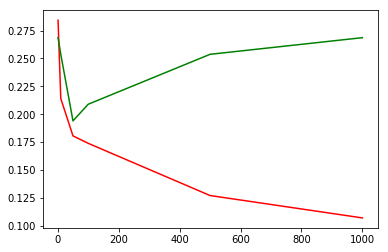

In [287]:
train_err_arr = []
test_err_arr = []
for i in [1,10,50,100,500, 1000]:
    bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=i)
    bdt.fit(X_train, y_train)
    train_err = 1 - bdt.score(X_train, y_train)
    test_err = 1 - bdt.score(X_test, y_test)
    train_err_arr.append([i, train_err])
    test_err_arr.append([i, test_err])
#     plt.scatter(i, train_err)
#     plt.scatter(i, test_err)
# print(train_err_arr)
train_err_arr = np.array(train_err_arr)
# print(train_err_arr)
test_err_arr = np.array(test_err_arr)
plt.plot(train_err_arr[:,0], train_err_arr[:, 1], c = 'r')
plt.plot(test_err_arr[:, 0], test_err_arr[:, 1], c = 'g')